<a href="https://colab.research.google.com/github/seungmin-son/ML_Practice/blob/main/%5BML_2%5DClassification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 불러오기

In [3]:
from sklearn import datasets 
import numpy as np

iris = datasets.load_iris()
X= iris.data[:,[2,3]]
y = iris.target
print(np.unique(y)) #y에 저장된 3 개의 고유한 class label을 반환, 꽃 3종류를 가져옴

[0 1 2]


# 데이터 셋을 train 용과 test용으로 분할

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.3, random_state = 1, stratify = y) #stratify 는 계층화 기능, data set들의  label비율을 동일하게 해줌

In [5]:
print(np.bincount(y)) #label을 확인
print(np.bincount(y_train))
print(np.bincount(y_test))

[50 50 50]
[35 35 35]
[15 15 15]


# feature 표준화 해주기

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() #sklearn 클래스
sc.fit(X_train) #샘플 평균과 표준편차 계산 메서드
X_train_std = sc.transform(X_train) #계산된 샘플평균과 표준편차를 사용하여 표준화를 시키는 메서드
X_test_std = sc.transform(X_test)

# Perceptron에 학습



In [7]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0 = 0.01,random_state = 1)
ppn.fit(X_train_std,y_train)

Perceptron(eta0=0.01, random_state=1)

In [8]:
y_pre = ppn.predict(X_test_std)
print((y_test != y_pre).sum())

2


In [9]:
from sklearn.metrics import accuracy_score #정확도 확인
print('%.3f.' % accuracy_score(y_test,y_pre))


0.956.


In [22]:
print(ppn.score(X_test_std,y_test))

0.9555555555555556


In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=colors[idx],marker=markers[idx], label=cl, edgecolor='black')
  
  if test_idx:
    # 모든 샘플 그리기
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0],X_test[:, 1],facecolor='none',edgecolor='black',alpha=1.0,linewidth=1,marker='o',s=100, label='test set')

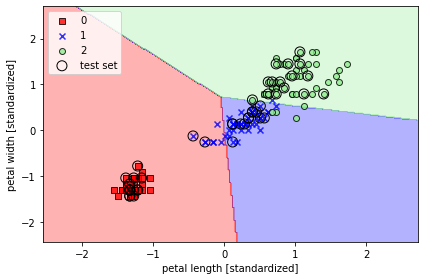

In [23]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [1]:
from IPython.display import Image
Image(url='https://git.io/Jtm22', width=500) 

# Adaline을 logistic regression으로 변경

In [29]:

import numpy as np

class LogisticRegressionGD(object):
  def __init__(self,eta=0.01,n_iter=50,random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self,X,y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0,scale=0.01, size= 1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      error = y - output
      self.w_[1:] += self.eta * X.T.dot(error)
      self.w_[0] += self.eta * error.sum()

      cost = -y.dot(np.log(output)) - (( 1 - y).dot(np.log(1 - output))) #logistic loss사용
      self.cost_.append(cost)
    return self

  def net_input(self,X):
    return np.dot(X,self.w_[1:]) + self.w_[0]

  def activation(self,z): #sigmoid사용
    return 1. / (1. + np.exp(-z))
    #return 1. / (1. + np.exp(-np.clip(z,-250,250)))

  def predict(self,X):
    return np.where(self.net_input(X) >= 0.0, 1, 0)

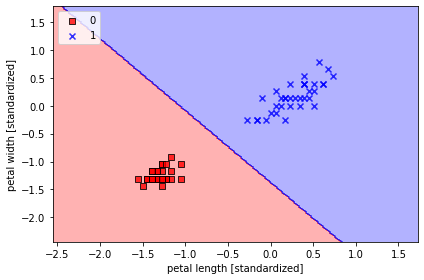

In [30]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset,classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# 사이킷런 내장 함수 사용

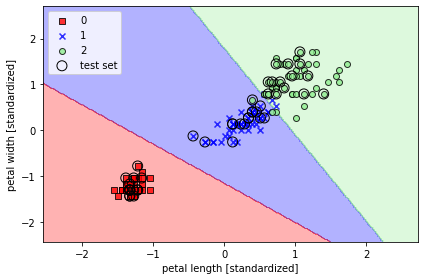

In [31]:
from sklearn.linear_model import LogisticRegression
Ir = LogisticRegression(C=100.0,random_state=1)
Ir.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined,classifier=Ir,test_idx= range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 모델 test


In [32]:
Ir.predict(X_test_std[:3,:])

array([2, 0, 0])

In [43]:
Ir.predict(X_test_std[0,:].reshape(1,-1))

array([2])

In [47]:
Ir.predict(X_test_std[:,:]) # 아마 비율대로 15개씩 나올거임 

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

# 서포트 벡터 머신

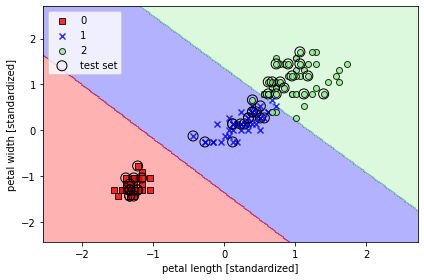

In [48]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()